In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('C:/Users/leo/Desktop/titanic/train.csv')
train.head()


train['Age'].fillna(30, inplace = True)

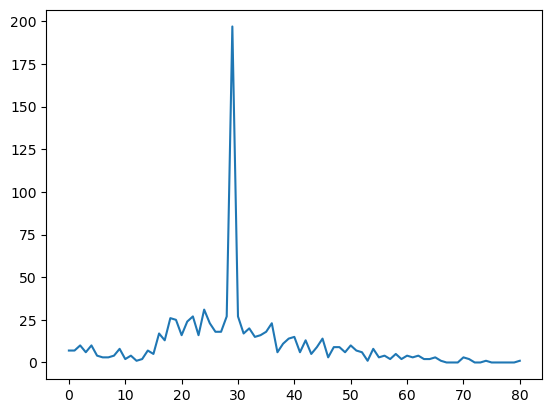

In [7]:
count = np.bincount(train['Age']) ##計算每個值出現的次數
plt.plot(count)

In [10]:
test = pd.read_csv('C:/Users/leo/Desktop/titanic/test.csv')
test.head()

test['Age'].isnull() #查看有沒有缺失值
test['Age'].fillna(test['Age'].mean() , inplace = True) #補缺失值

In [7]:
women = train.loc[train.Sex == 'female','Survived']
rate_women = sum(women)/len(women)

print(rate_women)


0.7420382165605095


In [25]:
#使用隨機森林

from sklearn.ensemble import RandomForestClassifier as rdc
y = train['Survived']

features = ["Pclass", "Sex", "SibSp", "Parch",'Age']
x = pd.get_dummies(train[features])  #one-hot encoding,用於將數據變為二進位
x_test = pd.get_dummies(test[features])

model = rdc(n_estimators = 100 , max_depth = 5 , random_state = 1)
model.fit(x,y)
predictions = model.predict(x_test)

output = pd.DataFrame({
    'PassengerId':test.PassengerId,
    'Survived':predictions
})

output.to_csv('submission.csv',index=False)